# Penguins Dataset Analysis

This notebook explores the Penguins dataset from Kaggle and builds ML models using custom implementations.

In [14]:
# Download Dataset from Kaggle

import os
import kagglehub

path = kagglehub.dataset_download("larsen0966/penguins")

print("Path to dataset files:", path)

Path to dataset files: /Users/mohammedbalkhair/.cache/kagglehub/datasets/larsen0966/penguins/versions/1


In [15]:
# Load Data

import pandas as pd

# Check what files are available in the dataset
files = os.listdir(path)
print("Files in dataset:", files)

# Load the penguins dataset (usually named penguins.csv or similar)
if 'penguins.csv' in files:
    df = pd.read_csv(os.path.join(path, 'penguins.csv'))
elif 'penguins_size.csv' in files:
    df = pd.read_csv(os.path.join(path, 'penguins_size.csv'))
else:
    # Try to find any CSV file
    csv_files = [f for f in files if f.endswith('.csv')]
    if csv_files:
        df = pd.read_csv(os.path.join(path, csv_files[0]))
        print(f"Loaded: {csv_files[0]}")
    else:
        raise FileNotFoundError("No CSV file found in dataset")

print(f"\nDataset shape: {df.shape}")
df.head()

Files in dataset: ['penguins.csv']

Dataset shape: (344, 9)


,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [16]:
# Explore Dataset Structure

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


,Unnamed: 0,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,344.000000,342.000000,342.000000,342.000000,342.000000,344.000000
mean,172.500000,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,99.448479,5.459584,1.974793,14.061714,801.954536,0.818356
min,1.000000,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,86.750000,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,172.500000,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,258.250000,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,344.000000,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [17]:
# Check for missing values and explore categorical columns

print("Missing values:")
print(df.isnull().sum())
print("\n" + "="*60)

# Check categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"\nCategorical columns: {list(categorical_cols)}")

for col in categorical_cols:
    print(f"\n{col} value counts:")
    print(df[col].value_counts())

Missing values:
Unnamed: 0            0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64


Categorical columns: ['species', 'island', 'sex']

species value counts:
species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

island value counts:
island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

sex value counts:
sex
male      168
female    165
Name: count, dtype: int64


In [18]:
# Explore Data Structure

print("All columns:", df.columns.tolist())
print("\nFirst few rows:")
print(df.head(10))

All columns: ['Unnamed: 0', 'species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex', 'year']

First few rows:
   Unnamed: 0 species     island  bill_length_mm  bill_depth_mm  \
0           1  Adelie  Torgersen            39.1           18.7   
1           2  Adelie  Torgersen            39.5           17.4   
2           3  Adelie  Torgersen            40.3           18.0   
3           4  Adelie  Torgersen             NaN            NaN   
4           5  Adelie  Torgersen            36.7           19.3   
5           6  Adelie  Torgersen            39.3           20.6   
6           7  Adelie  Torgersen            38.9           17.8   
7           8  Adelie  Torgersen            39.2           19.6   
8           9  Adelie  Torgersen            34.1           18.1   
9          10  Adelie  Torgersen            42.0           20.2   

   flipper_length_mm  body_mass_g     sex  year  
0              181.0       3750.0    male  2007  
1         

Numerical columns: ['Unnamed: 0', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'year']


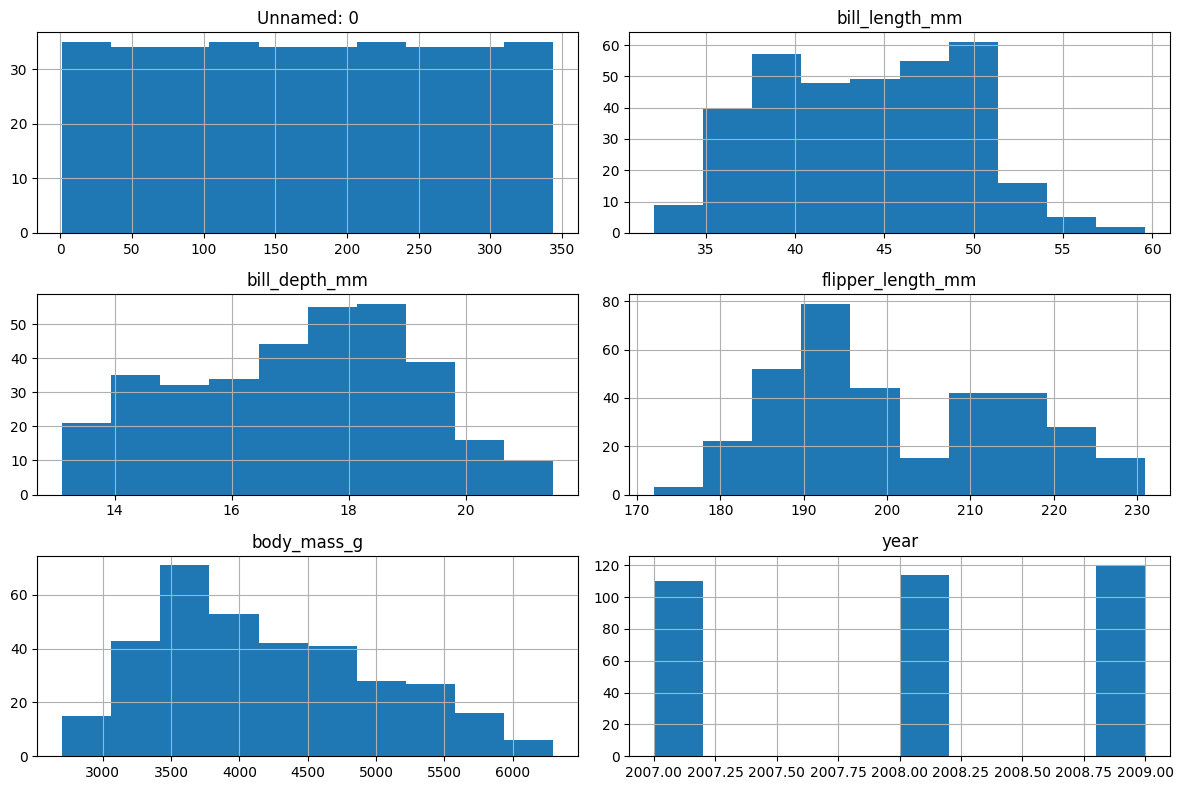


Correlation Matrix:
                   Unnamed: 0  bill_length_mm  bill_depth_mm  \
Unnamed: 0           1.000000        0.766039      -0.259563   
bill_length_mm       0.766039        1.000000      -0.235053   
bill_depth_mm       -0.259563       -0.235053       1.000000   
flipper_length_mm    0.455372        0.656181      -0.583851   
body_mass_g          0.275493        0.595110      -0.471916   
year                 0.339103        0.054545      -0.060354   

                   flipper_length_mm  body_mass_g      year  
Unnamed: 0                  0.455372     0.275493  0.339103  
bill_length_mm              0.656181     0.595110  0.054545  
bill_depth_mm              -0.583851    -0.471916 -0.060354  
flipper_length_mm           1.000000     0.871202  0.169675  
body_mass_g                 0.871202     1.000000  0.042209  
year                        0.169675     0.042209  1.000000  


In [19]:
# Visualize Data

import matplotlib.pyplot as plt
import seaborn as sns

# Plot distributions of numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical columns:", list(numerical_cols))

if len(numerical_cols) > 0:
    df[numerical_cols].hist(figsize=(12, 8))
    plt.tight_layout()
    plt.show()

# Correlation matrix for numerical features
if len(numerical_cols) > 1:
    print("\nCorrelation Matrix:")
    print(df[numerical_cols].corr())

# Data Preprocessing

Handle missing values and encode categorical variables.

In [20]:
# Handle missing values and prepare data
df_processed = df.copy()

# Set target column to 'species'
target_col = 'species'
task_type = 'classification'

print(f"Target column: {target_col}")

# Check if species column exists
if target_col not in df_processed.columns:
    # Try case variations
    if 'Species' in df_processed.columns:
        target_col = 'Species'
    else:
        raise ValueError(f"Column '{target_col}' not found in dataset. Available columns: {df_processed.columns.tolist()}")

print(f"Target unique values: {df_processed[target_col].unique()}")
print(f"Number of classes: {df_processed[target_col].nunique()}")

# Handle missing values - drop rows with missing values for simplicity
print(f"\nMissing values before cleaning: {df_processed.isnull().sum().sum()}")
df_processed = df_processed.dropna()
print(f"Missing values after cleaning: {df_processed.isnull().sum().sum()}")
print(f"Dataset shape after cleaning: {df_processed.shape}")

Target column: species
Target unique values: ['Adelie' 'Gentoo' 'Chinstrap']
Number of classes: 3

Missing values before cleaning: 19
Missing values after cleaning: 0
Dataset shape after cleaning: (333, 9)


In [21]:
# Encode categorical variables

# Separate numerical and categorical features (excluding target)
feature_cols = [col for col in df_processed.columns if col != target_col]
categorical_features = [col for col in feature_cols if df_processed[col].dtype == 'object']
numerical_features = [col for col in feature_cols if col not in categorical_features]

print("Categorical features:", categorical_features)
print("Numerical features:", numerical_features)

# One-hot encode categorical features
if categorical_features:
    cat_encoded = pd.get_dummies(df_processed[categorical_features], drop_first=False)
    # Combine numerical and encoded categorical
    X = pd.concat([df_processed[numerical_features], cat_encoded], axis=1)
else:
    X = df_processed[numerical_features]

y = df_processed[target_col]

# Encode target variable to numeric labels (XGBoost requires numeric labels)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = pd.Series(label_encoder.fit_transform(y), index=y.index, name=target_col)

print(f"\nFinal feature matrix shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Encoded classes: {dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))}")
print(f"\nFeature columns: {list(X.columns)}")
X.head()

Categorical features: ['island', 'sex']
Numerical features: ['Unnamed: 0', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'year']

Final feature matrix shape: (333, 11)
Target shape: (333,)
Encoded classes: {'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}

Feature columns: ['Unnamed: 0', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'year', 'island_Biscoe', 'island_Dream', 'island_Torgersen', 'sex_female', 'sex_male']


,Unnamed: 0,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,1,39.1,18.7,181.0,3750.0,2007,False,False,True,False,True
1,2,39.5,17.4,186.0,3800.0,2007,False,False,True,True,False
2,3,40.3,18.0,195.0,3250.0,2007,False,False,True,True,False
4,5,36.7,19.3,193.0,3450.0,2007,False,False,True,True,False
5,6,39.3,20.6,190.0,3650.0,2007,False,False,True,False,True


# Model Training

Using custom implementations from `src` module.

In [22]:
import sys
sys.path.append('../')

import numpy as np
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

print(f"\nTraining classes distribution:")
print(y_train.value_counts())
print(f"\nTest classes distribution:")
print(y_test.value_counts())

Training set shape: (266, 11)
Test set shape: (67, 11)

Training classes distribution:
species
0    115
2    101
1     50
Name: count, dtype: int64

Test classes distribution:
species
0    31
1    18
2    18
Name: count, dtype: int64


In [23]:
# Train XGBoost Model

from src import get_xgboost_classifier

model = get_xgboost_classifier(n_estimators=100, random_state=42, eval_metric='mlogloss')
model.fit(X_train, y_train)
print("XGBoost model trained successfully!")
print(f"Model type: {type(model).__name__}")
print(f"Predicting {len(np.unique(y))} penguin species classes")

XGBoost model trained successfully!
Model type: XGBClassifier
Predicting 3 penguin species classes


# Evaluate Model

Using our custom metrics and display functions from `src` to evaluate model performance.

In [24]:
# Make predictions and evaluate

y_pred = model.predict(X_test)

from src import display_metrics, precision, recall, f1_score
from sklearn.metrics import accuracy_score

print("Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision(y_test, y_pred):.4f}")
print(f"Recall: {recall(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")

display_metrics(y_test, y_pred, task_type='classification')

Model Performance:
Accuracy: 0.9701
Precision: 0.9798
Recall: 0.9630
F1 Score: 0.9713
MODEL PERFORMANCE METRICS

Classification Metrics:
  Precision: 0.979798
  Recall:    0.962963
  F1 Score:  0.971308



# Cross Validation and Grid Search

Using our custom cross-validation and grid search functions from `src` to find the best model.

In [25]:
# Cross Validation

from src import cross_validate
from sklearn.metrics import accuracy_score
from src import get_xgboost_classifier

# Prepare dataframe for cross-validation
df_cv = pd.concat([X, y], axis=1)
df_cv.rename(columns={target_col: 'target'}, inplace=True)

# Verify the column exists
if 'target' not in df_cv.columns:
    raise ValueError(f"Target column 'target' not found. Available columns: {df_cv.columns.tolist()}")

print("=== Custom Cross Validation ===")
best_model_cv, mean_score, std_score, all_scores = cross_validate(
    dataframe=df_cv,
    model=get_xgboost_classifier,
    target_col='target',
    k_folds=5,
    metric=accuracy_score,
    shuffle=True,
    random_state=42,
    n_estimators=100,
    eval_metric='mlogloss'
)
print(f"Mean Accuracy: {mean_score:.4f} (+/- {std_score:.4f})")
print(f"All fold scores: {[f'{s:.4f}' for s in all_scores]}")

=== Custom Cross Validation ===
Mean Accuracy: 0.9909 (+/- 0.0182)
All fold scores: ['0.9545', '1.0000', '1.0000', '1.0000', '1.0000']


In [26]:
# Grid Search for Hyperparameter Tuning

from src import grid_search_cv, get_xgboost_classifier

print("\n=== Grid Search ===")
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0]
}

grid_search = grid_search_cv(
    model=get_xgboost_classifier,
    X=X.values,
    y=y.values,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    eval_metric='mlogloss'
)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score (accuracy): {grid_search.best_score_:.4f}")

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("\nBest XGBoost Model Performance:")
from sklearn.metrics import accuracy_score
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
from src import display_metrics
display_metrics(y_test, y_pred_best, task_type='classification')


=== Grid Search ===
Best parameters: {'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Best score (accuracy): 0.9970

Best XGBoost Model Performance:
Accuracy: 1.0000
MODEL PERFORMANCE METRICS

Classification Metrics:
  Precision: 1.000000
  Recall:    1.000000
  F1 Score:  1.000000

